In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abalonedatasett/abalonee.csv


In [2]:
''' import thu vien '''
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
''' SK-Learn Library Import, Thư viện cung cấp một tập các công cụ xử lý các bài toán machine learning và statistical modeling gồm: classification , regression , clustering , và dimensionality reduction'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

In [4]:
''' import thu vien Scipy'''
from scipy.stats import skew

In [5]:
''' To Ignore Warning'''
import warnings
warnings.filterwarnings('ignore')

In [6]:
''' To Do : Inline Priting of Visualizations '''
sns.set()
%matplotlib inline

In [7]:
''' Importing Data : from the Archive Directly'''
df = pd.read_csv(r'../input/abalonedatasett/abalonee.csv')

In [8]:
'' 'Hiển thị phần đầu -> Để Kiểm tra xem dữ liệu có được nhập đúng cách hay không'''
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
''' Thông tin tính năng của DataSet'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### Theo Thông tin:

- 1) Dữ liệu No-Null
- 2) 1 - Loại đối tượng
- 3) 7 - Loại float
- 4) 1 - Loại Int

In [10]:
'''Các tính năng số và các tính năng phân loại'''
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:

'' 'Tính năng số và tính năng phân loại' ''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [12]:
'''Danh sách các tính năng số'''
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
''' Danh sách các tính năng phân loại'''
cf

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

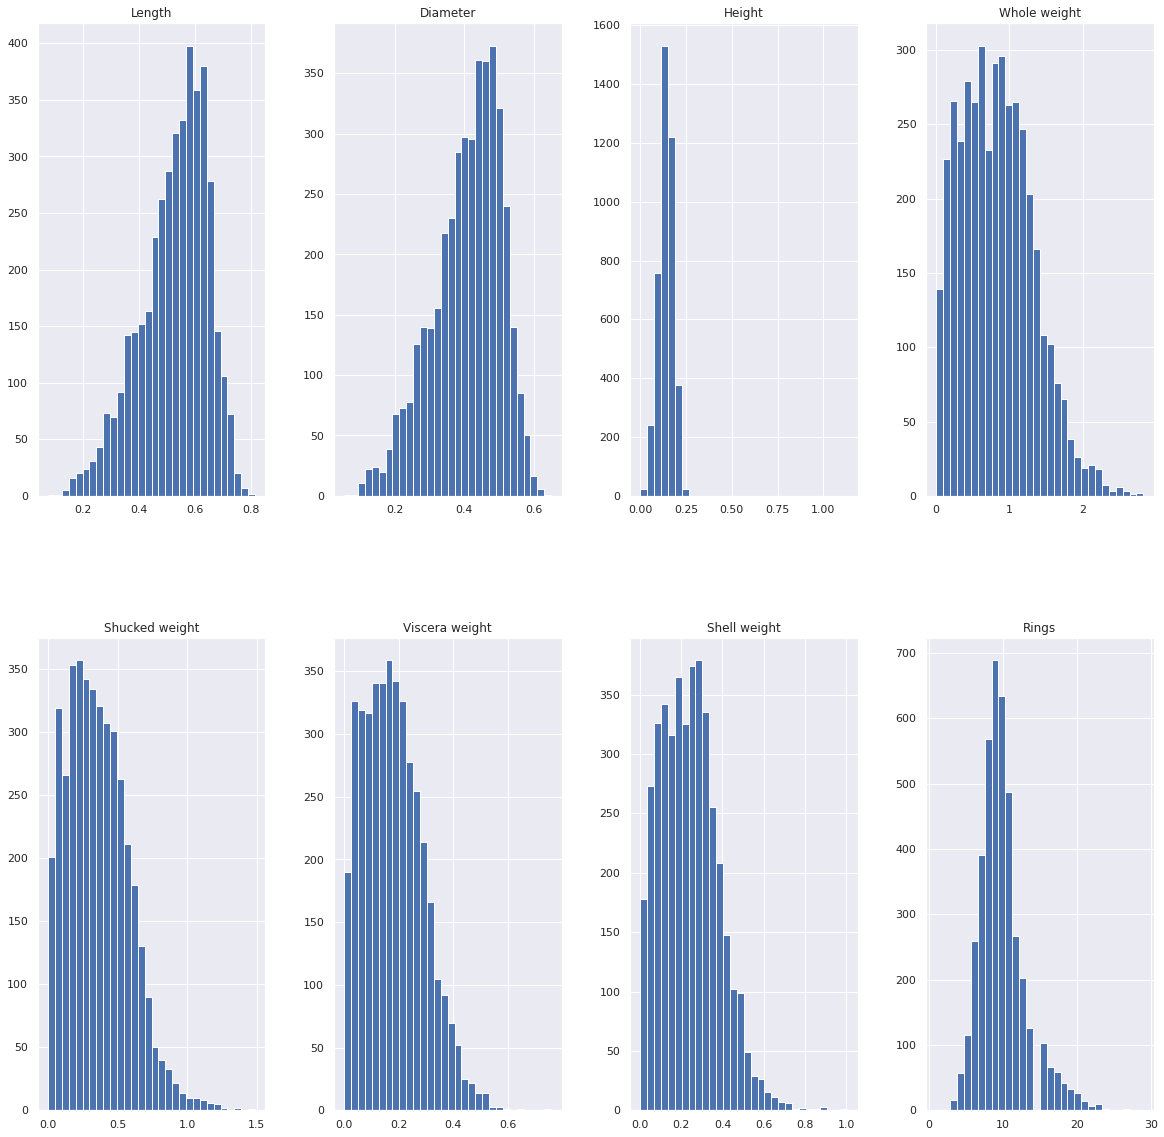

In [14]:
'''Biểu đồ: để xem phân phối dữ liệu số'''
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [15]:
'''Sau khi xem Biểu đồ phân phối dữ liệu phía trên, tôi cảm thấy Dữ liệu bị lệch, vì vậy hãy kiểm tra Độ lệch '''
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [16]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


###### 
Theo các quy tắc
- Đối với Dữ liệu được phân phối thông thường, Độ nghiêng phải lớn hơn 0
- Độ xiên> 0, Trọng lượng nhiều hơn nằm ở đuôi bên phải của phân phối


In [17]:
'''Giá trị bị mất '''
mv_df = df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [18]:
missing_df

,Missing Values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [19]:
'''Phân tích cột mục tiêu'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


###### No of Classes In Target

In [20]:
print(len(df.Rings.unique()))

28


### Visualization, hiển thị

<AxesSubplot:xlabel='Sex', ylabel='count'>

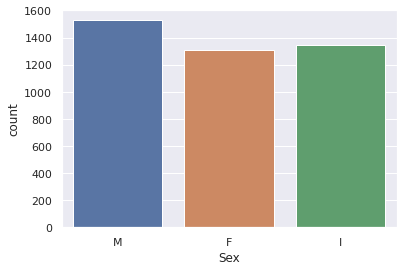

In [21]:
'''Số giới tính của Bào ngư, M - Nam, F - Nữ, I - Trẻ sơ sinh'''
sns.countplot(x='Sex', data = df)

In [22]:
'' 'Tỷ lệ giới tính ở Bào ngư' ''
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [23]:
'''Kỹ thuật tính năng nhỏ, Tuổi từ cột Nhẫn, Tuổi = Nhẫn + 1,5'''
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

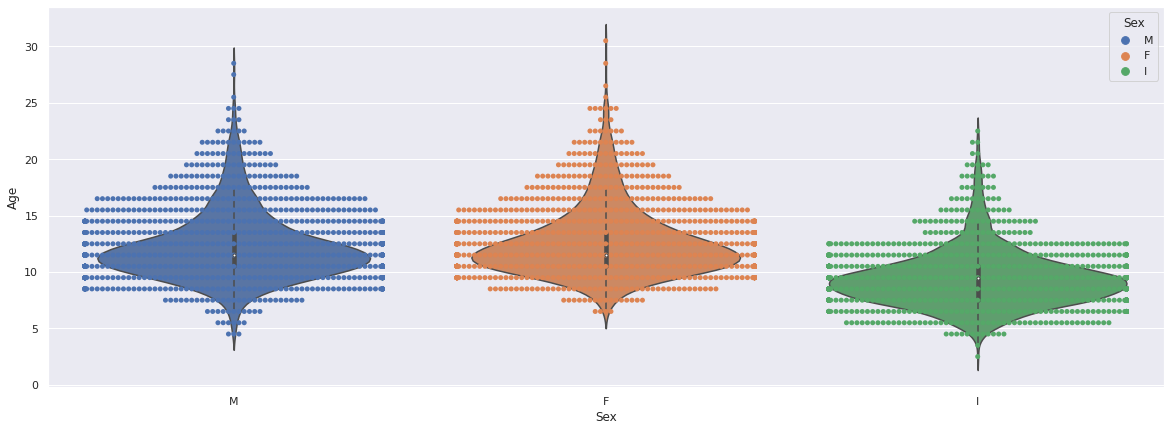

In [24]:
'''Hiển thị giới tính và tuổi tác'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

###### Theo Đồ thị trên
- Nam: Đa số Từ 7,5 đến 19
- Nữ: Đa số từ 8 đến 19
- Trẻ sơ sinh: Đa số Từ 6 đến <10

In [25]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


   ###### xử lí trước dữ liệu cho mô hình

In [26]:
'''LabelEnconding the Categorical Data, để chuyển đổi dữ liệu của dữ liệu phân loại trước khi xây dựng mô hình''''''LabelEnconding the Categorical Data'''
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [27]:
'''One Hot Encoding for Sex Feature '''
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [28]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


###### Tách dữ liệu cho mô hình
- Tính năng học tập
- Tính năng dự đoán
- Phân chia đào tạo & kiểm tra

In [29]:
'''taobienmuctieumi '''
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [30]:
'''Tính năng học tập và tính năng dự đoán'''
Xtrain = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = df['newRings']

In [31]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [32]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 1593 to 860
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2798 non-null   float64
 1   Diameter        2798 non-null   float64
 2   Height          2798 non-null   float64
 3   Whole weight    2798 non-null   float64
 4   Shucked weight  2798 non-null   float64
 5   Viscera weight  2798 non-null   float64
 6   Shell weight    2798 non-null   float64
 7   Sex_0           2798 non-null   float64
 8   Sex_1           2798 non-null   float64
 9   Sex_2           2798 non-null   float64
dtypes: float64(10)
memory usage: 240.5 KB


In [33]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 866 to 3431
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          1379 non-null   float64
 1   Diameter        1379 non-null   float64
 2   Height          1379 non-null   float64
 3   Whole weight    1379 non-null   float64
 4   Shucked weight  1379 non-null   float64
 5   Viscera weight  1379 non-null   float64
 6   Shell weight    1379 non-null   float64
 7   Sex_0           1379 non-null   float64
 8   Sex_1           1379 non-null   float64
 9   Sex_2           1379 non-null   float64
dtypes: float64(10)
memory usage: 118.5 KB


In [34]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [35]:
result_acc

0.7715736040609137

##### Vì vậy, để Xử lý Phân loại Nhiều Lớp, Chúng ta có thể Thử Mô hình SVM, vì nó hoạt động tốt cho Phân loại nhiều lớp và nhiều nhãn
###### Trước tiên, chúng tôi sẽ thử với tất cả 09 lớp trong cột mục tiêu, sử dụng hạt nhân tuyến tính, giá trị tham số điều chỉnh là 1 và gamma 1

In [36]:
'''Importing SVM from SK-Learn'''
from sklearn import svm

In [37]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [38]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [39]:
'''Making a Copy of the primary DataSet'''
new_df = df.copy()

In [40]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [41]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [42]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [43]:
Xtrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Sex_0           4177 non-null   float64
 8   Sex_1           4177 non-null   float64
 9   Sex_2           4177 non-null   float64
 10  newRings        4177 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 359.1 KB


In [44]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [45]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [46]:
result_acc

0.9840464104423495